# Import all packages

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import linalg
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import data_prep_functions as dat
import fp_plotting as fpp
import data_analysis as da
import matplotlib.colors
from scipy.signal import periodogram
from scipy.signal import welch
from scipy.stats import chi2
import datetime
import os

# Import data

In [2]:
depth = [0,5,13,21]
raw_therm_02 = dat.therm_data_merge('Thermistor', 2002, depth)
therm_02 = dat.therm_pd_to_xr(raw_therm_02, depth)

In [59]:
therm_ref = dat.xr_therm_analysis(therm_02, "1H", 1, 24)
therm_ref

<xarray.Dataset>
Dimensions:               (depth: 4, time: 8737)
Coordinates:
  * time                  (time) datetime64[ns] 2002-01-01 ... 2002-12-31
  * depth                 (depth) int32 0 5 13 21
Data variables:
    temperature           (time, depth) float64 nan nan nan nan ... nan nan nan
    temperature_filtered  (time, depth) float64 nan nan nan nan ... nan nan nan

In [4]:
raw_adcp_02 = dat.adcp_data_merge('ADCP', 2002)
adcp_02 = dat.adcp_pd_to_xr(raw_adcp_02)

In [60]:
adcp_ref = dat.xr_adcp_analysis(adcp_02, "1H", 1, 24)
adcp_ref

<xarray.Dataset>
Dimensions:             (depth: 21, time: 6073)
Coordinates:
  * time                (time) datetime64[ns] 2002-02-21T21:00:00 ... 2002-11...
  * depth               (depth) float64 -0.1 0.9 1.9 2.9 ... 16.9 17.9 18.9 20.9
Data variables:
    northward           (time, depth) float64 nan nan nan ... -0.001368 nan nan
    eastward            (time, depth) float64 nan nan nan ... -0.02779 nan nan
    northward_filtered  (time, depth) float64 nan nan nan nan ... nan nan nan
    eastward_filtered   (time, depth) float64 nan nan nan nan ... nan nan nan
    north_da            (time) float64 nan nan nan nan nan ... nan nan nan nan
    east_da             (time) float64 nan nan nan nan nan ... nan nan nan nan
    alongshore          (time, depth) float64 nan nan nan nan ... nan nan nan
    crossshore          (time, depth) float64 nan nan nan nan ... nan nan nan
    alongshore_da       (time) float64 nan nan nan nan nan ... nan nan nan nan
    crossshore_da       (time) float64 nan nan nan nan nan ... nan nan nan nan

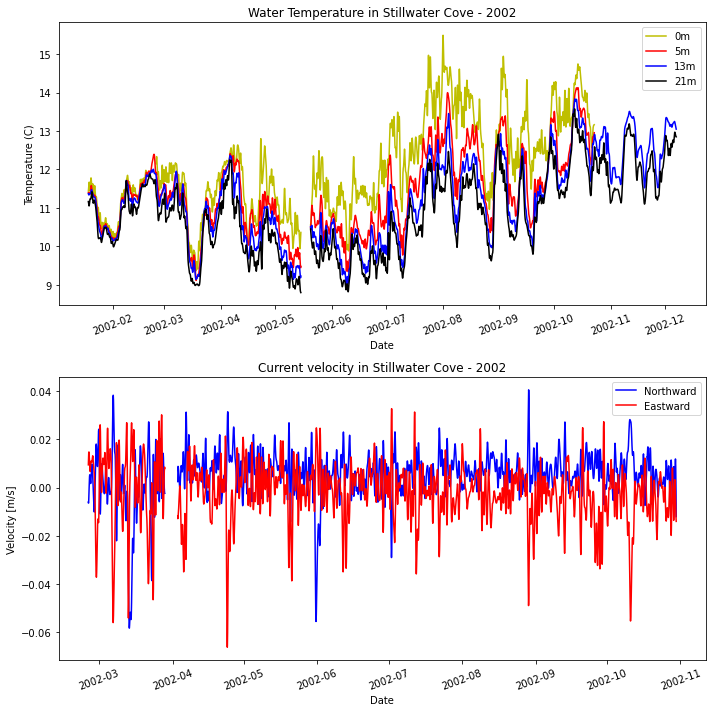

In [61]:
plt.figure(figsize = (10,10))
plt.subplot(211)
plt.plot(therm_ref.time, therm_ref.temperature_filtered.isel(depth=0), '-y')
plt.plot(therm_ref.time, therm_ref.temperature_filtered.isel(depth=1), '-r')
plt.plot(therm_ref.time, therm_ref.temperature_filtered.isel(depth=2), '-b')
plt.plot(therm_ref.time, therm_ref.temperature_filtered.isel(depth=3), '-k')
plt.ylabel('Temperature (C)')
plt.xlabel('Date')
plt.title('Water Temperature in Stillwater Cove - 2002')
plt.xticks(rotation=20)
plt.legend(['0m','5m','13m','21m'])

plt.subplot(212)
plt.plot(adcp_ref.time, adcp_ref.north_da, '-b')
plt.plot(adcp_ref.time, adcp_ref.east_da, '-r')
plt.ylabel('Velocity [m/s]')
plt.xlabel('Date')
plt.title('Current velocity in Stillwater Cove - 2002')
plt.xticks(rotation=20)
plt.legend(['Northward', 'Eastward'])

plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

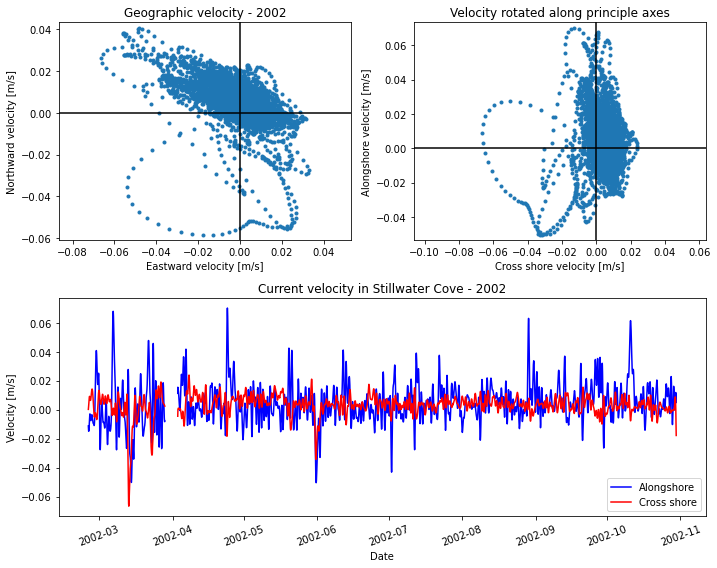

In [62]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.plot(adcp_ref.east_da, adcp_ref.north_da,'.')
plt.axis('equal')
plt.axvline(x=0,c='k')
plt.axhline(y=0,c='k')
plt.xlabel('Eastward velocity [m/s]')
plt.ylabel('Northward velocity [m/s]')
plt.title('Geographic velocity - 2002')

plt.subplot(222)
plt.plot(adcp_ref.crossshore_da, adcp_ref.alongshore_da,'.')
plt.axis('equal')
plt.axvline(x=0,c='k')
plt.axhline(y=0,c='k')
plt.xlabel('Cross shore velocity [m/s]')
plt.ylabel('Alongshore velocity [m/s]')
plt.title('Velocity rotated along principle axes')

plt.subplot(212)
plt.plot(adcp_ref.time, adcp_ref.alongshore_da, '-b')
plt.plot(adcp_ref.time, adcp_ref.crossshore_da, '-r')
plt.ylabel('Velocity [m/s]')
plt.xlabel('Date')
plt.title('Current velocity in Stillwater Cove - 2002')
plt.xticks(rotation=20)
plt.legend(['Alongshore', 'Cross shore'])

plt.tight_layout()
plt.show



In [63]:
summer_alongshore = adcp_ref.alongshore.loc["2002-06-01 00:00":"2002-08-01 23:30"]
summer_alongshore = summer_alongshore.isel(depth=[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
summer_alongshore = summer_alongshore.dropna('time')
summer_alongshore

<xarray.DataArray 'alongshore' (time: 1488, depth: 15)>
array([[-0.00525644, -0.01041531, -0.01703782, ..., -0.04100515,
        -0.03440371, -0.02568348],
       [-0.0013156 , -0.00732327, -0.01473903, ..., -0.03871013,
        -0.03271947, -0.02445298],
       [ 0.00249384, -0.00445155, -0.01265208, ..., -0.03602063,
        -0.03063406, -0.02287251],
       ...,
       [-0.00832604, -0.01107905, -0.00818365, ..., -0.0060627 ,
        -0.00313527,  0.00399696],
       [-0.00889892, -0.01126802, -0.00825118, ..., -0.00495106,
        -0.00215154,  0.00531521],
       [-0.00918964, -0.01121377, -0.00817664, ..., -0.00354135,
        -0.00093598,  0.00666638]])
Coordinates:
  * time     (time) datetime64[ns] 2002-06-01 ... 2002-08-01T23:00:00
  * depth    (depth) float64 3.9 4.9 5.9 6.9 7.9 ... 13.9 14.9 15.9 16.9 17.9

In [64]:
summer_crossshore = adcp_ref.crossshore.loc["2002-06-01 00:00":"2002-08-01 23:30"]
summer_crossshore = summer_crossshore.isel(depth=[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
summer_crossshore = summer_crossshore.dropna('time')
summer_crossshore

<xarray.DataArray 'crossshore' (time: 1488, depth: 15)>
array([[-0.00395083, -0.00665415, -0.01079719, ..., -0.0135298 ,
        -0.00926833, -0.00847112],
       [-0.00424344, -0.00658672, -0.01063978, ..., -0.0115069 ,
        -0.00775794, -0.00748104],
       [-0.00486237, -0.00687297, -0.01081526, ..., -0.00960084,
        -0.00630821, -0.00648195],
       ...,
       [-0.00744302,  0.00023657,  0.00500779, ...,  0.00894144,
         0.00885013,  0.00713508],
       [-0.00778114, -0.00049501,  0.00391988, ...,  0.00932631,
         0.00909628,  0.0065484 ],
       [-0.00783807, -0.00100259,  0.00304471, ...,  0.00957944,
         0.00915358,  0.00575549]])
Coordinates:
  * time     (time) datetime64[ns] 2002-06-01 ... 2002-08-01T23:00:00
  * depth    (depth) float64 3.9 4.9 5.9 6.9 7.9 ... 13.9 14.9 15.9 16.9 17.9

In [65]:
summer_crossshore.isel(time=1150)

<xarray.DataArray 'crossshore' (depth: 15)>
array([ 0.00751436,  0.00597251,  0.00456327,  0.00609014,  0.00759194,
        0.01066514,  0.01155159,  0.01143135,  0.01017726,  0.0082763 ,
        0.00715647,  0.00404598,  0.00042807, -0.00368814, -0.00716696])
Coordinates:
    time     datetime64[ns] 2002-07-18T22:00:00
  * depth    (depth) float64 3.9 4.9 5.9 6.9 7.9 ... 13.9 14.9 15.9 16.9 17.9

In [66]:
summer_therm = therm_ref.temperature_filtered.loc["2002-06-01 00:00":"2002-08-01 23:30"]
summer_therm = summer_therm.dropna('time')
summer_therm

<xarray.DataArray 'temperature_filtered' (time: 1488, depth: 4)>
array([[10.8565943 , 10.76172474, 10.61507428, 10.05276208],
       [10.86387573, 10.76404167, 10.61282859, 10.07600351],
       [10.86889981, 10.76492252, 10.60895839, 10.09790947],
       ...,
       [14.5671542 , 12.6755977 , 11.86955317, 11.42897069],
       [14.5891672 , 12.68052616, 11.85941736, 11.42333123],
       [14.6121202 , 12.6950698 , 11.85606355, 11.42290316]])
Coordinates:
  * time     (time) datetime64[ns] 2002-06-01 ... 2002-08-01T23:00:00
  * depth    (depth) int32 0 5 13 21

In [67]:
as_val, as_val_frac, as_vec, as_fac_load = da.PCA(summer_alongshore)
cs_val, cs_val_frac, cs_vec, cs_fac_load = da.PCA(summer_crossshore)
t_val, t_val_frac, t_vec, t_fac_load = da.PCA(summer_therm)

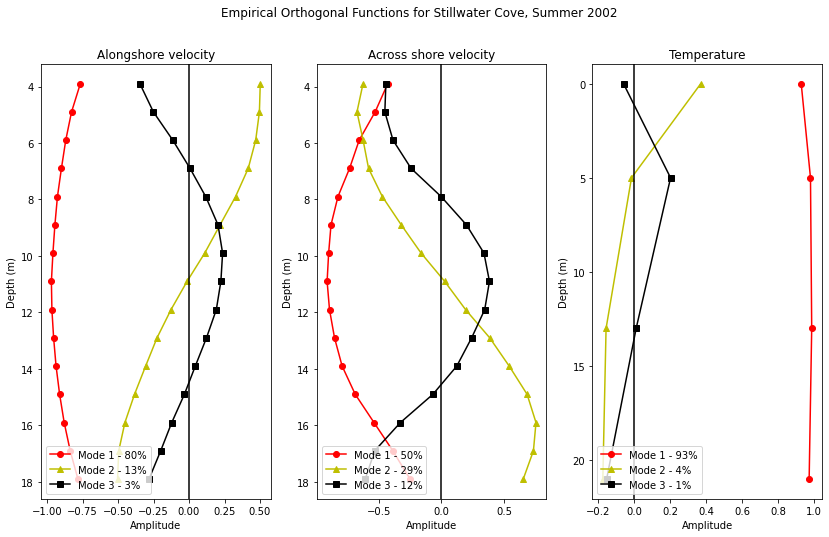

In [82]:
plt.figure(figsize=(14,8))
symbols = ['o-r', '^-y', 's-k']
plt.subplot(131)
variables = ['Mode 1 - ' + str(int(as_val_frac[0])) + '%', 
                 'Mode 2 - ' + str(int(as_val_frac[1])) + '%', 
                 'Mode 3 - ' + str(int(as_val_frac[2])) + '%']
for i,txt in enumerate(variables):
    plt.plot(as_fac_load[:,i], summer_alongshore.depth, symbols[i])
plt.axvline(x=0,c='k')
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Amplitude')
plt.legend(variables, loc='lower left')
plt.title('Alongshore velocity')

plt.subplot(132)
variables = ['Mode 1 - ' + str(int(cs_val_frac[0])) + '%', 
                 'Mode 2 - ' + str(int(cs_val_frac[1])) + '%', 
                 'Mode 3 - ' + str(int(cs_val_frac[2])) + '%']
for i,txt in enumerate(variables):
    plt.plot(cs_fac_load[:,i], summer_crossshore.depth, symbols[i])
plt.axvline(x=0,c='k')
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Amplitude')
plt.legend(variables, loc='lower left')
plt.title('Across shore velocity')

plt.subplot(133)
variables = ['Mode 1 - ' + str(int(t_val_frac[0])) + '%', 
                 'Mode 2 - ' + str(int(t_val_frac[1])) + '%', 
                 'Mode 3 - ' + str(int(t_val_frac[2])) + '%']
for i,txt in enumerate(variables):
    plt.plot(t_fac_load[:,i], summer_therm.depth, symbols[i])
plt.axvline(x=0,c='k')
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Amplitude')
plt.legend(variables, loc='lower left')
plt.title('Temperature')

plt.suptitle('Empirical Orthogonal Functions for Stillwater Cove, Summer 2002')
plt.savefig('EOF_Analysis.PNG')

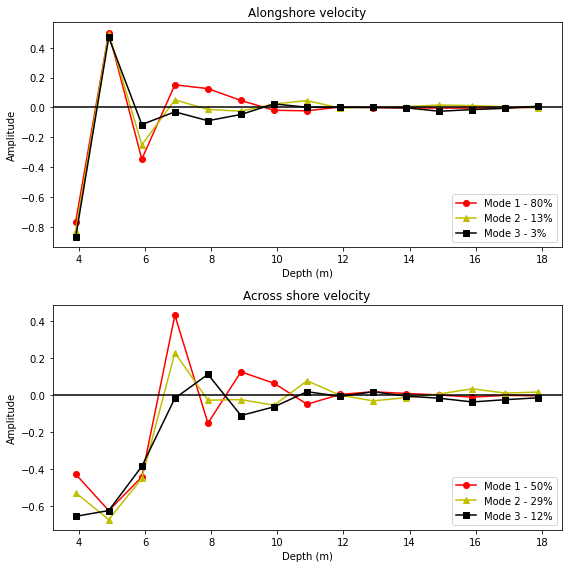

In [90]:
plt.figure(figsize=(8,8))
symbols = ['o-r', '^-y', 's-k']
plt.subplot(211)
variables = ['Mode 1 - ' + str(int(as_val_frac[0])) + '%', 
                 'Mode 2 - ' + str(int(as_val_frac[1])) + '%', 
                 'Mode 3 - ' + str(int(as_val_frac[2])) + '%']
for i,txt in enumerate(variables):
    plt.plot(summer_alongshore.depth, as_fac_load[i,:], symbols[i])
plt.axhline(y=0,c='k')
plt.xlabel('Depth (m)')
plt.ylabel('Amplitude')
plt.legend(variables, loc='lower right')
plt.title('Alongshore velocity')

plt.subplot(212)
variables = ['Mode 1 - ' + str(int(cs_val_frac[0])) + '%', 
                 'Mode 2 - ' + str(int(cs_val_frac[1])) + '%', 
                 'Mode 3 - ' + str(int(cs_val_frac[2])) + '%']
for i,txt in enumerate(variables):
    plt.plot(summer_crossshore.depth, cs_fac_load[i,:], symbols[i])
plt.axhline(y=0,c='k')
plt.xlabel('Depth (m)')
plt.ylabel('Amplitude')
plt.legend(variables, loc='lower right')
plt.title('Across shore velocity')

plt.tight_layout()

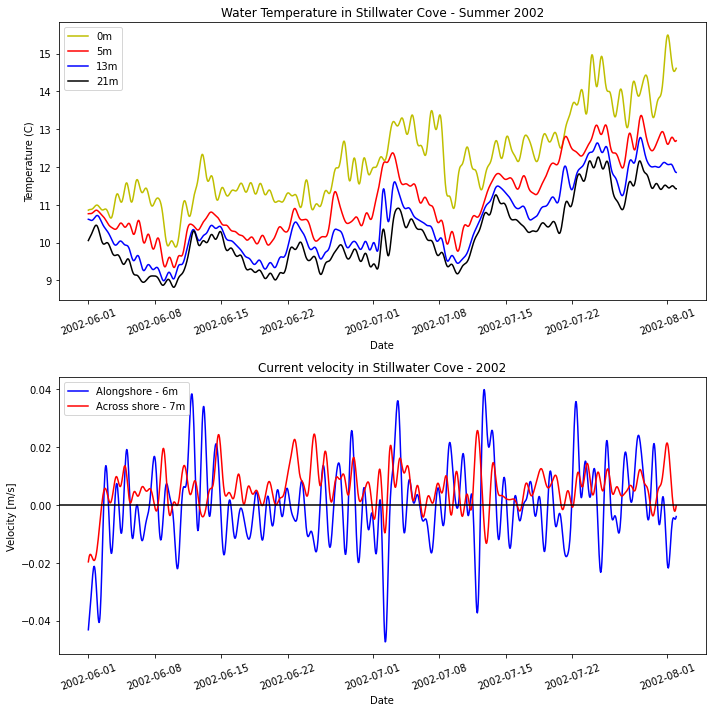

In [81]:
plt.figure(figsize = (10,10))
plt.subplot(211)
plt.plot(summer_therm.time, summer_therm.isel(depth=0), '-y')
plt.plot(summer_therm.time, summer_therm.isel(depth=1), '-r')
plt.plot(summer_therm.time, summer_therm.isel(depth=2), '-b')
plt.plot(summer_therm.time, summer_therm.isel(depth=3), '-k')
plt.ylabel('Temperature (C)')
plt.xlabel('Date')
plt.title('Water Temperature in Stillwater Cove - Summer 2002')
plt.xticks(rotation=20)
plt.legend(['0m','5m','13m','21m'])

plt.subplot(212)
plt.plot(summer_alongshore.time, summer_alongshore.isel(depth=7), '-b')
plt.plot(summer_crossshore.time, summer_crossshore.isel(depth=7), '-r')
plt.axhline(y=0,c='k')
plt.ylabel('Velocity [m/s]')
plt.xlabel('Date')
plt.title('Current velocity in Stillwater Cove - 2002')
plt.xticks(rotation=20)
plt.legend(['Alongshore - 6m', 'Across shore - 7m'])

plt.tight_layout()

In [113]:
def spec_analysis(data, samp_freq = 720, window = 'raw', unit = 'units', title = 'Spectral Analysis', lower_y=.00001, upper_y=1000):
    #data = data.dropna()
    N = len(data)
    fp,Sp = periodogram(data, fs=samp_freq)
    f3,S3 = welch(data, fs=samp_freq,nperseg=N,window='boxcar',detrend='linear')
    f4,S4 = welch(data, fs=samp_freq,nperseg=N/4,window='boxcar',detrend='linear')
    f5,S5 = welch(data, fs=samp_freq,nperseg=N/2,window='hamming',detrend='linear')
    f6,S6 = welch(data, fs=samp_freq,nperseg=N/4,window='hamming',detrend='linear')

    if window == str('raw'):
        # For the confidence interval
        edof = 2
        x2_upper = edof/chi2.ppf(.975, edof)
        x2_lower = edof/chi2.ppf(.025, edof)
    
        plt.figure(figsize=(10,4))
        plt.loglog(fp,Sp,'b')
        x = samp_freq/10
        y = upper_y/1000
        plt.plot(np.array([x,x]), y*np.array([x2_lower,x2_upper]),'k-')
        plt.xlabel('frequency [cpd]')
        plt.ylabel('PSD [' + str(unit) + '$^2$ cpd$^{-1}$]')
        plt.title(str(title))
        plt.ylim([lower_y, upper_y])
        return fp, Sp
        
    elif window == str('boxcar1'):
        edof = 8
        x2_upper = edof/chi2.ppf(.975, edof)
        x2_lower = edof/chi2.ppf(.025, edof)
    
        plt.figure(figsize=(10,4))
        plt.loglog(f3,S3,'r')
        x = samp_freq/10
        y = upper_y/1000
        plt.plot(np.array([x,x]), y*np.array([x2_lower,x2_upper]),'k-')
        plt.xlabel('frequency [cpd]')
        plt.ylabel('PSD [' + str(unit) + '$^2$ cpd$^{-1}$]')
        plt.title(str(title))
        plt.ylim([lower_y, upper_y])
        return f3, S3
        
    elif window == str('boxcar2'):
        edof = 8
        x2_upper = edof/chi2.ppf(.975, edof)
        x2_lower = edof/chi2.ppf(.025, edof)
    
        plt.figure(figsize=(10,4))
        plt.loglog(f4,S4,'g')
        x = samp_freq/10
        y = upper_y/1000
        plt.plot(np.array([x,x]), y*np.array([x2_lower,x2_upper]),'k-')
        plt.xlabel('frequency [cpd]')
        plt.ylabel('PSD [' + str(unit) + '$^2$ cpd$^{-1}$]')
        plt.title(str(title))
        plt.ylim([lower_y, upper_y])
        return f4, S4
        
    elif window == str('hamming1'):
        edof = 8 * 2.5164
        x2_upper = edof/chi2.ppf(.975, edof)
        x2_lower = edof/chi2.ppf(.025, edof)
    
        plt.figure(figsize=(10,4))
        plt.loglog(f5,S5,'m')
        x = samp_freq/10
        y = upper_y/1000
        plt.plot(np.array([x,x]), y*np.array([x2_lower,x2_upper]),'k-')
        plt.xlabel('frequency [cpd]')
        plt.ylabel('PSD [' + str(unit) + '$^2$ cpd$^{-1}$]')
        plt.title(str(title))
        plt.ylim([lower_y, upper_y])
        return f5, S5
        
    elif window == str('hamming2'):
        edof = 8 * 2.5164
        x2_upper = edof/chi2.ppf(.975, edof)
        x2_lower = edof/chi2.ppf(.025, edof)
    
        plt.figure(figsize=(10,4))
        plt.loglog(f3,S3,'r')
        x = samp_freq/10
        y = upper_y/1000
        plt.plot(np.array([x,x]), y*np.array([x2_lower,x2_upper]),'k-')
        plt.xlabel('frequency [cpd]')
        plt.ylabel('PSD [' + str(unit) + '$^2$ cpd$^{-1}$]')
        plt.title(str(title))
        plt.ylim([lower_y, upper_y])
        return f6, S6
        
    else :
        plt.figure(figsize=(10,4))
        plt.loglog(fp,Sp,'b')
        plt.loglog(f3,S3,'r')
        plt.loglog(f4,S4,'g')
        plt.loglog(f5,S5,'m')
        plt.loglog(f6,S6,'y')
        plt.xlabel('frequency [cpd]')
        plt.ylabel('PSD [' + str(unit) + '$^2$ cpd$^{-1}$]')
        plt.title(str(title))
        plt.legend(['raw','pre-whitened','segment length = N/4','segment length = N/2, Hamming','segment length = N/4, Hamming'],loc='lower left')
        plt.ylim([lower_y, upper_y])

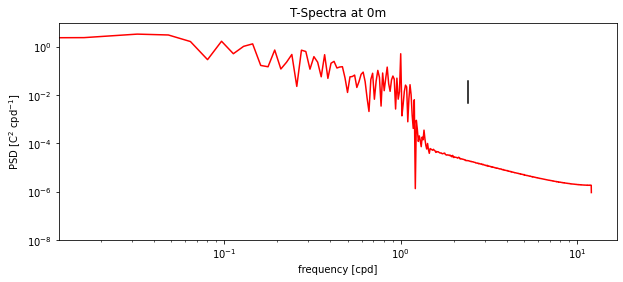

In [114]:
fs, Sp = spec_analysis(summer_therm.isel(depth=0), 24, 'boxcar1', 'C', 'T-Spectra at 0m', 1E-8, 10)
#spec_analysis(summer_alongshore.isel(depth=7), 24, 'boxcar1', 'm/s', 'V-Spectra at 11m', lower_y=1E-9, upper_y=.01)
#spec_analysis(summer_crossshore.isel(depth=7), 24, 'boxcar1', 'm/s', 'U-Spectra at 11m', lower_y=1E-9, upper_y=.001)


In [71]:
from scipy import signal

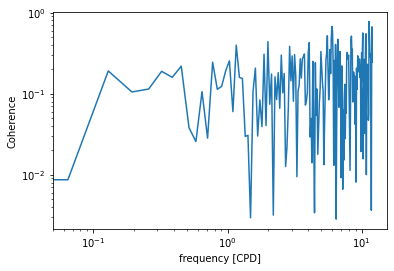

In [124]:
f, Cxy = signal.coherence(summer_alongshore.isel(depth=5), summer_therm.isel(depth=0), 24, nperseg=len(summer_therm)/4)
plt.loglog(f, Cxy)
plt.xlabel('frequency [CPD]')
plt.ylabel('Coherence')
plt.show()